In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture       
from sklearn.metrics import silhouette_score
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_predict
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
import sklearn.cluster
from numpy import quantile, where, random
import matplotlib.pyplot as plt


# load data 

In [2]:
data = pd.read_csv("powerline_dataset.csv")
y=data[['Output (S)']]
data = data[['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']]
X=data[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']]
trr=data[['Output (S)']]
tss=data[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']]
X = X.to_numpy()
y=y.to_numpy()



scaler = StandardScaler()
X=scaler.fit_transform(X)


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
sss.get_n_splits(X, y)

#stratified split


for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

svm_clf = SVC() 
svm_clf.fit(X_train,y_train)




print(X)


TRAIN: [5642 7676 3938 ... 5933 1426 5502] TEST: [ 8715  5432 10584 ... 11445  6784 11121]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[-0.46979973  0.10009242  0.459871    0.12701278 -1.80193373  1.71922075]
 [-0.34190004  0.09155696  0.31027008  0.26424305 -1.71438652  1.49236984]
 [-0.25685457  0.08496841  0.21187509  0.37696635 -1.64913814  1.31499272]
 ...
 [-0.19132295  0.17633503  0.01242719  0.29632386 -1.51753252  1.26017073]
 [-0.1902171   0.17355147  0.01434143  0.3231795  -1.52559472  1.24180512]
 [-0.18907368  0.1707642   0.01621315  0.34993927 -1.53325752  1.22312557]]


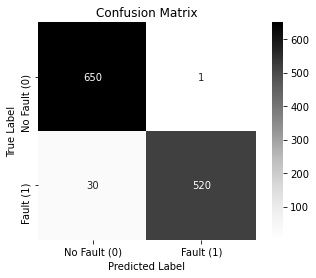

In [3]:
y_pred = svm_clf.predict(X_test)
y_test = y_test
conf_mat = confusion_matrix(y_test, y_pred)
lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greys', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [4]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)
print("SVM Classifier")
print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative)
print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative))
print("Accuracy:", accuracy)

SVM Classifier
True Positives: 520
True Negatives: 650
False Positives: 1
False Negatives: 30
Precision: 0.9980806142034548
Recall: 0.9454545454545454
Accuracy: 0.974188176519567


# decision tree classifier


In [5]:
#decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=14, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, random_state=42)

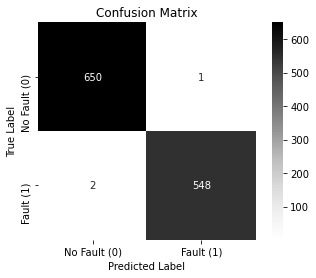

In [6]:
y_pred = tree_clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred.round())
lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greys', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [7]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)
print(" Decision Tree Classifier ")
print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative)
print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative))
print("Accuracy:", accuracy)

 Decision Tree Classifier 
True Positives: 548
True Negatives: 650
False Positives: 1
False Negatives: 2
Precision: 0.9981785063752276
Recall: 0.9963636363636363
Accuracy: 0.9975020815986678


# RandomForestClassifier

In [8]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

<ipython-input-8-42c4a7591fa9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

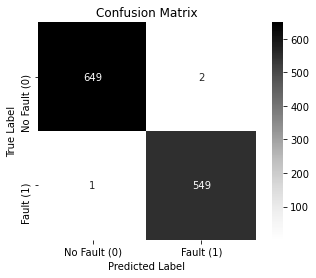

In [9]:
y_pred = forest_clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greys', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, y_test)
print("Random Forest Classifier")
print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative)
print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative))
print("Accuracy:", accuracy)

Random Forest Classifier
True Positives: 549
True Negatives: 649
False Positives: 2
False Negatives: 1
Precision: 0.9963702359346642
Recall: 0.9981818181818182
Accuracy: 0.9975020815986678


In [11]:
#importing libraries  
from pandas import Series, DataFrame
import scipy
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, LeakyReLU
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error 
import seaborn as sb
import math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#checking for asumptions is the part we are doing after the data laoding and visualization part


# MLP 1

In [12]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(50, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(25, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                350       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,651
Trainable params: 1,651
Non-trainable params: 0
_________________________________________________________________


In [13]:
NN_model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split = 0.2)


Epoch 1/300
270/270 [==============================] - 1s 4ms/step - loss: 0.3028 - accuracy: 0.9520 - val_loss: 0.0778 - val_accuracy: 0.9755
Epoch 2/300
270/270 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9822 - val_loss: 0.0478 - val_accuracy: 0.9852
Epoch 3/300
270/270 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9874 - val_loss: 0.0415 - val_accuracy: 0.9861
Epoch 4/300
270/270 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.0330 - val_accuracy: 0.9894
Epoch 5/300
270/270 [==============================] - 1s 4ms/step - loss: 0.0295 - accuracy: 0.9898 - val_loss: 0.0324 - val_accuracy: 0.9889
Epoch 6/300
270/270 [==============================] - 1s 4ms/step - loss: 0.0281 - accuracy: 0.9909 - val_loss: 0.0310 - val_accuracy: 0.9917
Epoch 7/300
270/270 [==============================] - 1s 4ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.0287 - val_accuracy: 0.9898

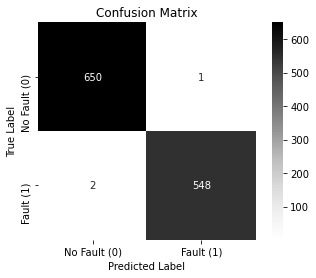

In [16]:
y_pred = NN_model.predict(X_test).reshape((-1,)) 

conf_mat = confusion_matrix(y_test, y_pred.round())

lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greys', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [20]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred.round(), y_test)
print("Random Forest Classifier")
print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative)
print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative))
print("Accuracy:", accuracy)

Random Forest Classifier
True Positives: 548
True Negatives: 650
False Positives: 1
False Negatives: 2
Precision: 0.9981785063752276
Recall: 0.9963636363636363
Accuracy: 0.9975020815986678


# #model 2


In [21]:
##model 2

hidden_units2 = 100
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model2 = Sequential([
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dense(75, kernel_initializer='normal', activation='relu'),Dropout(0.2),
    Dense(25, kernel_initializer='normal', activation='relu'),
      

    Dense(1, kernel_initializer='normal', activation='sigmoid')
  ])
  return model2
# build the model
model2 = build_model_using_sequential()

In [22]:
model2.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000002040DC34310>>

In [23]:
model2 = build_model_using_sequential()

In [26]:
model2.compile(
    loss=binary_crossentropy, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
)
# train the model
history = model2.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=50,
    validation_split=0.1
)

Epoch 1/100
195/195 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 0.9901 - val_loss: 0.0015 - val_accuracy: 0.9935
Epoch 2/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9924 - val_loss: 0.0011 - val_accuracy: 0.9954
Epoch 3/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0027 - accuracy: 0.9907 - val_loss: 0.0019 - val_accuracy: 0.9926
Epoch 4/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9925 - val_loss: 0.0014 - val_accuracy: 0.9944
Epoch 5/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9915 - val_loss: 0.0030 - val_accuracy: 0.9917
Epoch 6/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9920 - val_loss: 0.0014 - val_accuracy: 0.9954
Epoch 7/100
195/195 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9902 - val_loss: 0.0029 - val_accuracy: 0.9935

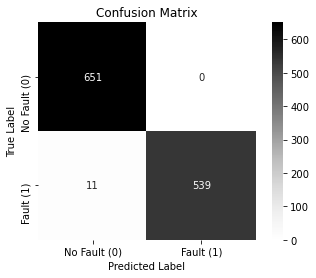

In [30]:
y_pred = model2.predict(X_test).reshape((-1,)) 

conf_mat = confusion_matrix(y_test, y_pred.round())

lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greys', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred.round(), y_test)
print("Model 2")
print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative)
print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative))
print("Accuracy:", accuracy)

Model 2
True Positives: 539
True Negatives: 651
False Positives: 0
False Negatives: 11
Precision: 1.0
Recall: 0.98
Accuracy: 0.9908409658617818


# MODEL 3 MLP

In [44]:
model3 = Sequential()
model3.add(Dense(50))
model3.add(LeakyReLU(alpha=0.3))
model3.add(Dense(25))
model3.add(LeakyReLU(alpha=0.3))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='RMSprop')

In [51]:
model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2)


Epoch 1/100
270/270 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.0098
Epoch 2/100
270/270 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.00971 - ETA: 0s - loss: 0.01
Epoch 3/100
270/270 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.0218
Epoch 4/100
270/270 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0099
Epoch 5/100
270/270 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0092
Epoch 6/100
270/270 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0175
Epoch 7/100
270/270 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0094
Epoch 8/100
270/270 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0195
Epoch 9/100
270/270 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.01491 - ETA: 0s - loss: 0.01
Epoch 10/100
270/270 [=====================

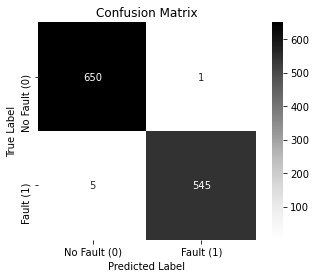

In [54]:
y_pred = model3.predict(X_test).reshape((-1,)) 

conf_mat = confusion_matrix(y_test, y_pred.round())

lang = ['No Fault (0)', 'Fault (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greys', fmt='d', cbar=True, ax=ax, xticklabels=lang, yticklabels=lang)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [55]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred.round(), y_test)
print("Model 3")
print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative)
print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative))
print("Accuracy:", accuracy)

Model 3
True Positives: 545
True Negatives: 650
False Positives: 1
False Negatives: 5
Precision: 0.9981684981684982
Recall: 0.990909090909091
Accuracy: 0.9950041631973355
